# Guide to generate_contour_data.py and make_plot.py

This is a guide to generate_contour_data.py and make_plot.py, the two main codes used in BOWIE, Binary Observability With Illustrative Exploration. For information on dictionary options for the inputs of these functions, see "dictionary_options.txt". These dictionaries are used as input here in the notebook; however, these can also be constructed into .json input files. See generate_config.json and make_plot_config.json. To run these from the command line, you can run the codes using the code name followed by the configuration file. For example, "generate_contour_data.py generate_config.json." The python codes will read in the .json files similarly to the dict inputs used here. 

For specific information on the code structures, classes used, and class and function inputs, please refer to the code documentation by using the python help() function.

Please refer to and cite (###ADD SUBMITTED LINK HERE ###) for this usage of this tool and an example of its application. The codes here are shared under the GNU license. 

In [15]:
from generate_contour_data import generate_contour_data
from make_plot import plot_main
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## generate_contour_data.py

generate_contour_data.py generates gridded data with specified parameters of binary black holes for x and y, and signal-to-noise ratio (SNR) for z. The SNR is calculated by inputing as many sensitivity curves (as txt files) as desired. Output can be in .txt or compressed .hdf5 for larger files.

### Inputs

- Set of Binary Parameters
- Set of Sensitivity Curves

### Outputs

- File of gridded SNR values

## make_plot.py

make_plot.py is a tool for gravitational wave analysis. It was originally designed for the LISA gravitational wave mission, but has broad applications. It provides a gridded array of plots for comparisons of sensitivity curves and/or binary parameters. This guide will walk you through the uses of this code. Therefore, included here is information on how to create the configuration file (make_plot_config.json). For specific information on the code structure, classes used, and class and function inputs, please refer to the code documentation by using the python function help(make_plot). Please refer to and cite (###ADD SUBMITTED LINK HERE ###) for this usage of this tool and an example of its application. 

### Generic Inputs

make_plot.py takes as an input, a gridded data set with columns representing the x values, y values, and z values. For this particular application, and throughout the guide, the x value will be the signal-to-noise ratio (SNR), but the tool itself is generic to whatever z value the user prefers. 

This input can take the form of a file (like the output from generate_contour_data.py), or can be in the form a dict within a code or notebook. In this guide, I will use both to show booth options. The main difference is json has lower case true and false for boolean, while python has True and False. 

### Basic Outputs

In this section I will describe the three basic types of plots this tool can produce. To do this, I will import the code and create my own dict in this notebook containing desired inputs. The dict will exactly resemble what can be assembled using a json file besides the boolean capitalization. 

# Example 1

Generate Data for Plot 1: generate a 300x300 grid of source frame total mass [$10^2M_\odot$, $10^8M_\odot$] and redshift [$10^{-2}$, $10^2$] for the full waveform through inspiral, merger, and ringdown. Fix the mass ratio to 1/2. Use different spins of 0.8 for $m_1$ and 0.6 for $m_2$. This plot will only need one sensitivity curve. We will use the Proposed LISA sensitivity, received in private communication with Antoine Petiteau, without the galactic foreground. We will output to an hdf5 file.   

In [ ]:
generate_plot_1_dict = {

"general":
    {
    "WORKING_DIRECTORY": ".",
    
    "signal_type": ["all"],
    "generation_type": "parallel",
    "num_processors": 4,
    "num_splits":2000,
    "add_wd_noise": "False"
    },

"output_info":
    {
    "output_folder": "paper_data",
    "output_file_name":"plot_1_data",
    "output_file_type":"hdf5",
    "x_col_name": "M_s",
    "y_col_name": "z",
    "added_note": "No white dwarf noise."
    },


"input_info":
    {
    "freq_column_label": "f",
    "amplitude_column_label": "ASD", 
    "sensitivity_curves": 
        [
        #proposed LISA only
        {"name":"PL.txt", "type":"ASD"}
        ],
    "sensitivity_averaging_factor":0.3872983346,
    "input_location":"noise_curves"
    },

"generate_info":
    {
    "xscale": "log",
    "num_x": 300,
    "x_low": 1e2,
    "x_high": 1e10,
    "xval_name": "total_mass",
    "xval_unit": "SolarMasses",

    "yscale": "log",
    "num_y": 300,
    "y_low": 1e-2,
    "y_high": 1e2,
    "yval_name": "redshift",

    "yval_unit": "None",

    "fixed_parameter_1": 0.5,
    "par_1_name": "mass_ratio",
    "par_1_unit": "None",

    # use different spins
    "fixed_parameter_2": 0.8,
    "par_2_name": "spin_1",
    "par_2_unit": "None",
        
    "fixed_parameter_3": 1.0,
    "par_3_name": "start_time",
    "par_3_unit": "Years",

    "fixed_parameter_4": 0.0,
    "par_4_name": "end_time",
    "par_4_unit": "Years",

    "fixed_parameter_5": 0.6,
    "par_5_name": "spin_2",
    "par_5_unit": "None",
        
    #all of the averaging factors together make sqrt(16/5)
    #snr_factor is sqrt(2) for the 6 link detector
    "snr_calculation_factors":
        {
        "averaging_factor": 0.692820323,
        "snr_factor": 1.4142135624
        }
    }
}

generate_contour_data(generate_plot_1_dict)

## Waterfall Plot

The waterfall plot is a general filled contour plot. You can define values for the contours, but there are default values shown in the plot below. These plots resemble figure 3 in the LISA Mission Proposal.

In [ ]:
waterfall_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",

    "fig_y_label": "Redshift",
    "fig_x_label": "Total Mass ($M_\odot$)",
        
    "file_name":"plot_1_data.hdf5"
    },



"plot_info":
    {

    "0":{
        "file":[
            {"label":"PL_all"}
            ],
        "type": "Waterfall"
        }
    }
}

plot_main(waterfall_dict)

### Edit the Plot in Python

We also provide the option of editing the plots with the matplotlib.pyplot interface. This is done by supplying a value of True for the optional argument return_fig_ax. We will zoom in to very high redshifts and use some general plotting functions to show this interface.

In [ ]:
fig, ax = plot_main(waterfall_dict, return_fig_ax=True)
ax[0].set_title('Waterfall Plot for $a_1=0.8$, $a_2=0.6$ and $q=1/2$', fontsize=20)
ax[0].set_xlim(5,7)
ax[0].set_ylim(30,40)
ax[0].set_yticks([30,32,34,36,38,40])
ax[0].set_yticklabels([30,32,34,36,38,40])

# Example 2

Generate Data for Plot 2: generate a 500x500 grid of mass ratio [$10^{-4}$, 1] and source frame total mass [$10^2M_\odot$, $10^8M_\odot$] for the full waveform for ringdown. Fix the redshift to 2. Use the same spin for both black holes (0.0). This plot will need two sensitivity curves. We will use the Proposed LISA sensitivity, received in private communication with Antoine Petiteau, and Classic LISA from Larson et al 2000. The Hils-Bender white dwarf background is used. We will output to an hdf5 file.

In [4]:
generate_plot_2_dict = {

"general":
    {
    "WORKING_DIRECTORY": ".",
    
    "signal_type": ["rd"],
    "generation_type": "parallel",
    "num_processors": 4,
    "num_splits":2000,
    "add_wd_noise": "True"
    },

"output_info":
    {
    "output_folder": "paper_data",
    "output_file_name":"plot_2_data",
    "output_file_type":"hdf5",
    "x_col_name": "q",
    "y_col_name": "M_s",
    "added_note": "Hils-Bender white dwarf noise."
    },


"input_info":
    {
    "freq_column_label": "f",
    "amplitude_column_label": "ASD", 
    "sensitivity_curves": 
        [
        {"name":"PL.txt", "type":"ASD"},
        {"name":"CL.txt", "type":"ASD"}
        ],
    "sensitivity_averaging_factor":0.3872983346,
    "input_location":"noise_curves",
    "Galactic_background": 
        {"name":"WDnoise.txt", "type":"ASD"}
    },

"generate_info":
    {
    "xscale": "log",
    "num_x": 500,
    "x_low": 1e-4,
    "x_high": 1e0,
    "xval_name": "mass_ratio",
    "xval_unit": "None",

    "yscale": "log",
    "num_y": 500,
    "y_low": 1e2,
    "y_high": 1e10,
    "yval_name": "total_mass",

    "yval_unit": "SolarMasses",

    "fixed_parameter_1": 2.0,
    "par_1_name": "redshift",
    "par_1_unit": "None",

    # use same spins
    "fixed_parameter_2": 0.0,
    "par_2_name": "spin",
    "par_2_unit": "None",

    #half year of inspiral. Just needs to be greater than zero, since we want the ringdown. 
    "fixed_parameter_3": 0.5,
    "par_3_name": "start_time",
    "par_3_unit": "Years",

    "fixed_parameter_4": 0.0,
    "par_4_name": "end_time",
    "par_4_unit": "Years",

    #using par_5_name == "same_spin" with take the other spin value. 
    "par_5_name": "same_spin",
    "par_5_unit": "None",
        
    #all of the averaging factors together make sqrt(16/5)
    #snr_factor is sqrt(2) for the 6 link detector
    "snr_calculation_factors":
        {
        "averaging_factor": 0.692820323,
        "snr_factor": 1.4142135624
        }
    }
}

generate_contour_data(generate_plot_2_dict)

start pool num process: 125 

outputing file
185.80231189727783


## Ratio Difference and Loss/Gain Contours

Ratio plots show the ratio of the SNR from one dataset to another ($\rho_1/\rho_2$).The first dataset is inputed as $\rho_1$. It is then compared against the "control", $\rho_2$. The loss (gain) contours refer to sources from the first dataset with an SNR above (below) a certain value, while the second dataset has an SNR below (above) that same value. This value can be set as the "SNR_CUT" global variable, or specifically for the plot of interest with the "snr_contour_value" option. Filled grey contour lines indicate gained sources while dashed lines indicate lost sources.

/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:503: RuntimeWarning: invalid value encountered in greater_equal
  inds_gained = np.where((zout>=comparison_value) & (control_zout< comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:503: RuntimeWarning: invalid value encountered in less
  inds_gained = np.where((zout>=comparison_value) & (control_zout< comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:504: RuntimeWarning: invalid value encountered in less
  inds_lost = np.where((zout<comparison_value) & (control_zout>=comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:504: RuntimeWarning: invalid value encountered in greater_equal
  inds_lost = np.where((zout<comparison_value) & (control_zout>=comparison_value))
/Users/michaelkatz/Google Drive/Research/PythonCodes/BOWIE/make_plot.py:507: RuntimeWarning: invalid value encountered in less
  inds_ri

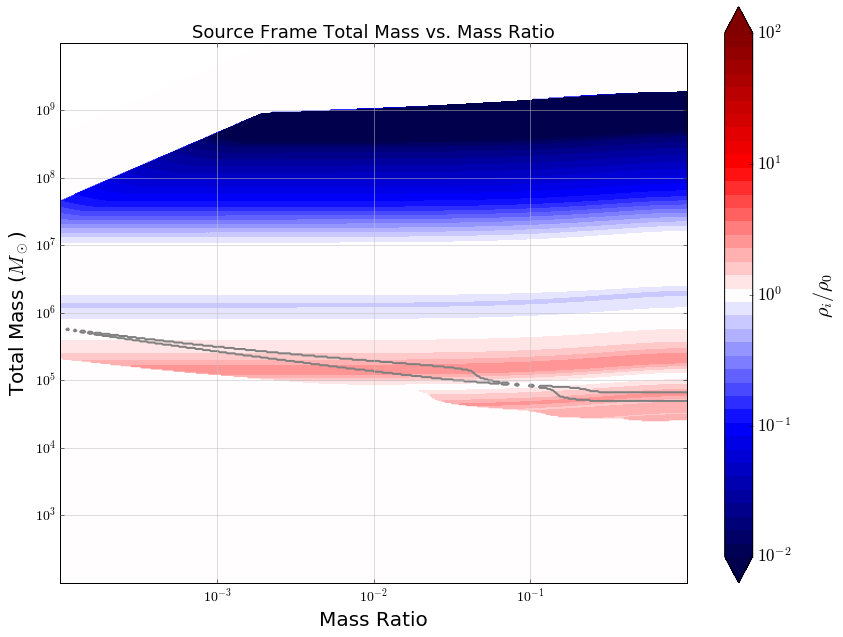

In [6]:
ratio_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "x_column_label": "q",
    "y_column_label": "M_s", 

    "figure_width": 13.0,
    "figure_height": 10.0,
    "spacing": "wide",

    "num_rows": 1,
    "num_cols": 1,

    "ylims": [2.0, 10.0],
    "dy": 1.0,
    "yscale": "log",
    "file_name": 

    "xlims": [-4.0, 0.0],
    "dx": 1.0,
    "xscale": "log",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"plot_2_data.hdf5",
             "label":"PL_wd_rd"}
            ],
        "type": "Ratio",
        "control":
            {"name":"plot_2_data.hdf5",
             "label":"CL_wd_rd"},
        "label":
            {"title": "Source Frame Total Mass vs. Mass Ratio", 
             "title_fontsize": 18,  "ylabel": r"Total Mass ($M_\odot$)", 
             "xlabel": "Mass Ratio"},
        }
    }
}


plot_main(ratio_dict)

# Example 3

Generate Data for Plot 3: generate a 200x200 grid of total mass [$10^{0}M_\odot$, $10^{3}M_\odot$] and luminosity distance [$10^0$ Mpc, $10^5$ Mpc] for the inpiral phase (for these binaries, the only signal will be inspiral). Fix spins to 0.8. Rather than sensitivity curves, we will compare four values of mass ratio [1.0, 0.7, 0.4, 0.1]. For these binaries, we want earlier evolutions. Therefore, the start time will be 20 years before merger and an end time of 10 years before merger. This plot will need one sensitivity curve. We will use the Proposed LISA sensitivity, received in private communication with Antoine Petiteau, without galactic background noise. We will output to an hdf5 file.

In [5]:
for q, q_label in [[1.0, '1'], [0.7, '07'], [0.4, '04'], [0.1, '01']]:
    generate_plot_3_dict = {

"general":
    {
    "WORKING_DIRECTORY": ".",
    
    "signal_type": ["ins"],
    "generation_type": "parallel",
    "num_processors": 4,
    "num_splits":2000,
    "add_wd_noise": "False"
    },

"output_info":
    {
    "output_folder": "paper_data",
    "output_file_name":"plot_3_data_%s"%q_label,
    "output_file_type":"hdf5",
    "x_col_name": "M_s",
    "y_col_name": "D_L"
    },


"input_info":
    {
    "freq_column_label": "f",
    "amplitude_column_label": "ASD", 
    "sensitivity_curves": 
        [
        {"name":"PL.txt", "type":"ASD"}
        ],
    "sensitivity_averaging_factor":0.3872983346,
    "input_location":"noise_curves"
    },

"generate_info":
    {
    "xscale": "log",
    "num_x": 200,
    "x_low": 1e0,
    "x_high": 1e3,
    "xval_name": "total_mass",
    "xval_unit": "None",

    "yscale": "log",
    "num_y": 200,
    "y_low": 1e0,
    "y_high": 1e5,
    "yval_name": "luminosity_distance",

    "yval_unit": "Mpc",

    "fixed_parameter_1": q,
    "par_1_name": "mass_ratio",
    "par_1_unit": "None",

    # use same spins
    "fixed_parameter_2": 0.8,
    "par_2_name": "spin",
    "par_2_unit": "None",
        
    #ten year observation starting at 20 years before merger
    "fixed_parameter_3": 20.0,
    "par_3_name": "start_time",
    "par_3_unit": "Years",

    "fixed_parameter_4": 10.0,
    "par_4_name": "end_time",
    "par_4_unit": "Years",

    #using par_3_name == "same_spin" will take the other spin value. 
    "par_5_name": "same_spin",
    "par_5_unit": "None",
        
    #all of the averaging factors together make sqrt(16/5)
    #snr_factor is sqrt(2) for the 6 link detector
    "snr_calculation_factors":
        {
        "averaging_factor": 0.692820323,
        "snr_factor": 1.4142135624
        }
    }
}

    generate_contour_data(generate_plot_3_dict)

start pool num process: 20 

outputing file
51.62211298942566
start pool num process: 20 

outputing file
54.80070400238037
start pool num process: 20 

outputing file
72.89121294021606
start pool num process: 20 

outputing file
90.70795893669128


## Horizon Plot

Horizon plots are helpful for comparing more than two parameters. They show contour lines at either "SNR_CUT" or a specified value with "snr_contour_value." 

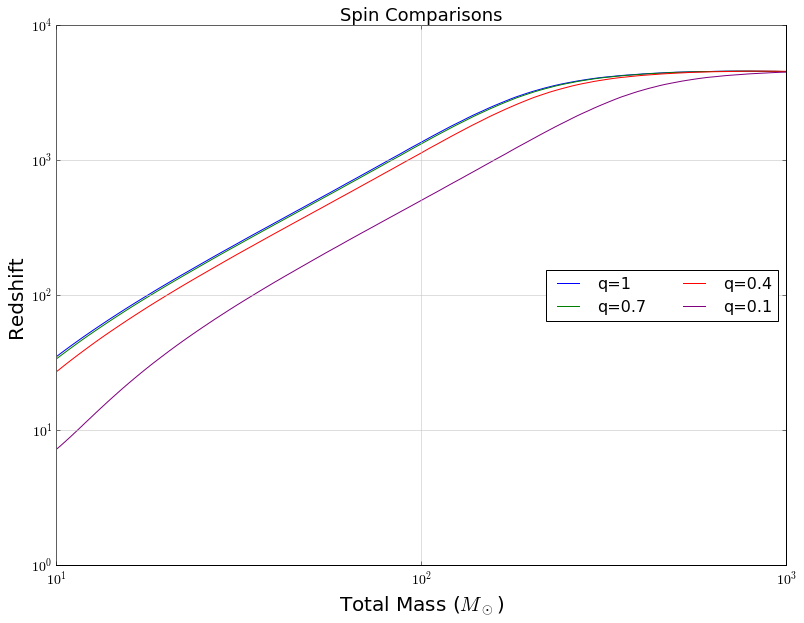

In [14]:
horizon_dict = {
"general":{
    "WORKING_DIRECTORY": "paper_data",

    "SNR_CUT": 5.0,

    "x_column_label": "M_s",
    "y_column_label": "D_L", 

    "figure_width": 13.0,
    "figure_height": 10.0,
    "spacing": "wide",

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [1.0, 3.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 4.0],
    "dy": 1.0,
    "yscale": "log",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"plot_3_data_1.hdf5",
             "label":"PL_ins"},
            {"name":"plot_3_data_07.hdf5",
             "label":"PL_ins"},
            {"name":"plot_3_data_04.hdf5",
             "label":"PL_ins"},
            {"name":"plot_3_data_01.hdf5",
             "label":"PL_ins"}
            ],
        "type": "Horizon",
        "label":
            {"title": "Spin Comparisons", 
             "title_fontsize": 18,  "xlabel": r"Total Mass ($M_\odot$)", 
             "ylabel": "Redshift"},

        
        "legend":
            {
            "labels": ["q=1", "q=0.7", "q=0.4", "q=0.1"],
            "loc": "center right",
            "size":16,
            "ncol": 2
            },
        }
    }
}


plot_main(horizon_dict)